## Applying VAR model

From Granger_Causality_test, we found that NVIDIA's close difference Granger Causes Apple's close difference. We will include NVIDIA's close difference in our VAR model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

import yfinance as yf

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
apple = yf.Ticker("AAPL")
nvidia = yf.Ticker("NVDA")

apple_data = apple.history(start='2023-01-01', end='2024-01-01')
nvda_data = nvidia.history(start='2023-01-01', end='2024-01-01')

apple_data['Diff'] = apple_data['Close'].diff()
nvda_data['Diff'] = nvda_data['Close'].diff()

## Granger Causality 

In [4]:
df = pd.DataFrame()
df['Apple Diff'] = apple_data['Diff'].copy()
df['NVDA Diff'] = nvda_data['Diff'].copy()

In [5]:
grangercausalitytests(df[['Apple Diff', 'NVDA Diff']].dropna(), maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5999  , p=0.4394  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.6072  , p=0.4358  , df=1
likelihood ratio test: chi2=0.6065  , p=0.4361  , df=1
parameter F test:         F=0.5999  , p=0.4394  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9334  , p=0.1469  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=3.9468  , p=0.1390  , df=2
likelihood ratio test: chi2=3.9156  , p=0.1412  , df=2
parameter F test:         F=1.9334  , p=0.1469  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5978  , p=0.1906  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=4.9337  , p=0.1767  , df=3
likelihood ratio test: chi2=4.8848  , p=0.1804  , df=3
parameter F test:         F=1.5978  , p=0.1906  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2016  , p=0.0695  

{1: ({'ssr_ftest': (0.5998863287412693, 0.4393682095602186, 245.0, 1),
   'ssr_chi2test': (0.6072318756238155, 0.43583196559957493, 1),
   'lrtest': (0.6064896785292149, 0.43611257787729807, 1),
   'params_ftest': (0.5998863287412687, 0.4393682095602186, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.9334298450110203, 0.1468790909257435, 242.0, 2),
   'ssr_chi2test': (3.9467534852704294, 0.13898674047952392, 2),
   'lrtest': (3.91555329517314, 0.14117194724174822, 2),
   'params_ftest': (1.9334298450110037, 0.14687909092574622, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.597753977448083, 0.19058333439174352, 239.0, 3),
   'ssr_chi2test': (4.933650357140942, 0.17672056329474514, 3),
   'lrtest': (4.884828653935074, 0.18042744076723874, 3),
   'params_ftest': (1.5977539774480902, 0.19058333439174283, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

Granger Causality test detects strongest causality at lag = 9 (F = 2.0843, p = 0.0320). Thus, lag 9 would be our optimal lag.

## Import our synthetic missing data

In [6]:
data = pd.read_csv("../apple_2023_masked.csv", parse_dates=[0], infer_datetime_format = True)
data = data.set_index('Date')

In [7]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
Date,,,,,,,,,,,,
2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548


In [8]:
# Forecast missing values
def impute_missing_values(data, results,s):
    for i in range(len(data)):
        ## s="1day diff", "2day diff",..., "5day diff"
        if np.isnan(data[s].iloc[i]):  # Check if the Adj Diff Missing is np.nan
            # Get the previous available data points up to the maxlags
            data_slice = data.drop(columns = [s]).iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data[s].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
    return data

In [9]:
def gc_optimal_lag(data, variables,test='ssr_chi2test', verbose=False):    
    #test_result = grangercausalitytests(data[variables], maxlag=15, verbose=False)
    test_result = grangercausalitytests(data[variables].dropna(), maxlag=15, verbose=False)
    p_values = [round(test_result[i+1][0][test][1],4) for i in range(15)]
    min_p_value = np.min(p_values)
    if min_p_value < 0.05:
        opt_lag = 1 + np.argmin(p_values) # index starts from 0 while lag starts from 1
    else:
        opt_lag = 9 ## from our analysis above
    return opt_lag    

## Imputing missing 1day

In [10]:
## Create a dataframe that contains 1day (missing 3 data points)

df1 = data[['Close','1day']].copy()
df1['NVDA Diff'] = nvda_data['Diff']

## Baseline Model
df1['Interpolating'] = df1['1day'].interpolate(method='linear')
mses1 = {}
mses1['Linear Interpolating'] = mean_squared_error(df1['Interpolating'],df1['Close'])*(len(df1)/(data['1day'].isnull().sum()))


## Create imputing dataframe
df1_imputing = df1.copy()

# Filliing NA data to apply VAR
df1_imputing['1day diff'] = df1_imputing['1day'].diff()
df1_imputing['VAR imputation'] = df1_imputing['1day diff'].ffill().bfill()
#df1_imputing['VAR imputation'] = df1_imputing['1day diff'].interpolate(method='linear')
df1_imputing = df1_imputing[['1day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df1_imputing = df1_imputing.drop(df1_imputing.index[[0]])
df1_imputing
## VAR
lag_1 = gc_optimal_lag(df1_imputing, ['1day diff', 'NVDA Diff'])
model_1 = VAR(df1_imputing.drop(columns=['1day diff']))
lag_1 = gc_optimal_lag(df1_imputing, ['VAR imputation', 'NVDA Diff'])
print(lag_1)
results_1 = model_1.fit(lag_1)
imputed_data_1 = impute_missing_values(df1_imputing.copy(), results_1, '1day diff')

df1['1day diff'] = imputed_data_1['1day diff']

for i in range(len(df1)):
    if np.isnan(df1["1day"].iloc[i]):
        df1["1day"].iloc[i] = df1["1day diff"].iloc[i]+df1["1day"].iloc[i-1]

# Compute MSE
mses1['VAR model'] = mean_squared_error(df1['1day'],data['Close'])*(len(df1)/(data['1day'].isnull().sum()))

mses1

9


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 0.679228361280242, 'VAR model': 2.649501741881111}

## Imputing missing 2day

In [11]:
## Create a dataframe that contains 1day (missing 3 data points)

df2 = data[['Close','2day']].copy()
df2['NVDA Diff'] = nvda_data['Diff']

## Baseline Model
df2['Interpolating'] = df2['2day'].interpolate(method='linear')
mses2 = {}
mses2['Linear Interpolating'] = mean_squared_error(df2['Interpolating'],df2['Close'])*(len(df2)/(data['2day'].isnull().sum()))


## Create imputing dataframe
df2_imputing = df2.copy()

# Filliing NA data to apply VAR
df2_imputing['2day diff'] = df2_imputing['2day'].diff()
df2_imputing['VAR imputation'] = df2_imputing['2day diff'].ffill().bfill()
df2_imputing = df2_imputing[['2day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df2_imputing = df2_imputing.drop(df2_imputing.index[[0]])

## VAR
lag_2 = gc_optimal_lag(df2_imputing, ['2day diff', 'NVDA Diff'])
model_2 = VAR(df2_imputing.drop(columns=['2day diff']))
print(lag_2)
results_2 = model_2.fit(lag_2)
imputed_data_2 = impute_missing_values(df2_imputing.copy(), results_2, '2day diff')

df2['2day diff'] = imputed_data_2['2day diff']

for i in range(len(df2)):
    if np.isnan(df2["2day"].iloc[i]):
        df2["2day"].iloc[i] = df2["2day diff"].iloc[i]+df2["2day"].iloc[i-1]

# Compute MSE
mses2['VAR model'] = mean_squared_error(df2['2day'],data['Close'])*(len(df2)/(data['2day'].isnull().sum()))

mses2

9


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 2.526317467717179, 'VAR model': 5.378330537548219}

## Imputing Missing 3day

In [12]:
## Create a dataframe that contains 3day (missing 3 data points)

df3 = data[['Close','3day']].copy()
df3['NVDA Diff'] = nvda_data['Diff']

## Baseline Model
df3['Interpolating'] = df3['3day'].interpolate(method='linear')
mses3 = {}
mses3['Linear Interpolating'] = mean_squared_error(df3['Interpolating'],df3['Close'])*(len(df3)/(data['3day'].isnull().sum()))


## Create imputing dataframe
df3_imputing = df3.copy()

# Filliing NA data to apply VAR
df3_imputing['3day diff'] = df3_imputing['3day'].diff()
df3_imputing['VAR imputation'] = df3_imputing['3day diff'].ffill().bfill()
df3_imputing = df3_imputing[['3day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df3_imputing = df3_imputing.drop(df3_imputing.index[[0]])

## VAR
lag_3 = gc_optimal_lag(df3_imputing, ['3day diff', 'NVDA Diff'])
model_3 = VAR(df3_imputing.drop(columns=['3day diff']))
print(lag_3)
results_3 = model_3.fit(lag_3)
imputed_data_3 = impute_missing_values(df3_imputing.copy(), results_3, '3day diff')

df3['3day diff'] = imputed_data_3['3day diff']

for i in range(len(df3)):
    if np.isnan(df3["3day"].iloc[i]):
        df3["3day"].iloc[i] = df3["3day diff"].iloc[i]+df3["3day"].iloc[i-1]

# Compute MSE
mses3['VAR model'] = mean_squared_error(df3['3day'],data['Close'])*(len(df3)/(data['3day'].isnull().sum()))

mses3

9


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 1.8751985815220782, 'VAR model': 9.2559893211581}

## Imputing Missing 4day

In [13]:
## Create a dataframe that contains 4day (missing 4 data points)

df4 = data[['Close','4day']].copy()
df4['NVDA Diff'] = nvda_data['Diff']

## Baseline Model
df4['Interpolating'] = df4['4day'].interpolate(method='linear')
mses4 = {}
mses4['Linear Interpolating'] = mean_squared_error(df4['Interpolating'],df4['Close'])*(len(df4)/(data['4day'].isnull().sum()))


## Create imputing dataframe
df4_imputing = df4.copy()

# Filliing NA data to apply VAR
df4_imputing['4day diff'] = df4_imputing['4day'].diff()
#df4_imputing['VAR imputation'] = df4_imputing['4day diff'].ffill().bfill()
df4_imputing['VAR imputation'] = df4_imputing['4day diff'].interpolate(method='linear')
df4_imputing = df4_imputing[['4day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df4_imputing = df4_imputing.drop(df4_imputing.index[[0]])

## VAR
lag_4 = gc_optimal_lag(df4_imputing, ['4day diff', 'NVDA Diff'])
model_4 = VAR(df4_imputing.drop(columns=['4day diff']))
#lag_4 = gc_optimal_lag(df4_imputing, ['VAR imputation', 'NVDA Diff'])
print(lag_4)
results_4 = model_4.fit(lag_4)
imputed_data_4 = impute_missing_values(df4_imputing.copy(), results_4, '4day diff')

df4['4day diff'] = imputed_data_4['4day diff']

for i in range(len(df4)):
    if np.isnan(df4["4day"].iloc[i]):
        df4["4day"].iloc[i] = df4["4day diff"].iloc[i]+df4["4day"].iloc[i-1]

# Compute MSE
mses4['VAR model'] = mean_squared_error(df4['4day'],data['Close'])*(len(df4)/(data['4day'].isnull().sum()))

mses4


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


12


{'Linear Interpolating': 3.398599024755626, 'VAR model': 13.442297627391287}

## Imputing Missing 5day

In [14]:
## Create a dataframe that contains 5day (missing 5 data points)

df5 = data[['Close','5day']].copy()
df5['NVDA Diff'] = nvda_data['Diff']

## Baseline Model
df5['Interpolating'] = df5['5day'].interpolate(method='linear')
mses5 = {}
mses5['Linear Interpolating'] = mean_squared_error(df5['Interpolating'],df5['Close'])*(len(df5)/(data['5day'].isnull().sum()))


## Create imputing dataframe
df5_imputing = df5.copy()

# Filliing NA data to apply VAR
df5_imputing['5day diff'] = df5_imputing['5day'].diff()
#df5_imputing['VAR imputation'] = df5_imputing['5day diff'].ffill().bfill()
df5_imputing['VAR imputation'] = df5_imputing['5day diff'].interpolate(method='linear')
df5_imputing = df5_imputing[['5day diff','VAR imputation', 'NVDA Diff']]

# Remove the first NaN row.
df5_imputing = df5_imputing.drop(df5_imputing.index[[0]])

## VAR
lag_5 = gc_optimal_lag(df5_imputing, ['5day diff', 'NVDA Diff'])
model_5 = VAR(df5_imputing.drop(columns=['5day diff']))
print(lag_5)
results_5 = model_5.fit(lag_5)
imputed_data_5 = impute_missing_values(df5_imputing.copy(), results_5, '5day diff')

df5['5day diff'] = imputed_data_5['5day diff']

for i in range(len(df5)):
    if np.isnan(df5["5day"].iloc[i]):
        df5["5day"].iloc[i] = df5["5day diff"].iloc[i]+df5["5day"].iloc[i-1]

# Compute MSE
mses5['VAR model'] = mean_squared_error(df5['5day'],data['Close'])*(len(df5)/(data['5day'].isnull().sum()))

mses5

9


C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'Linear Interpolating': 3.475544046464251, 'VAR model': 20.542833458826635}

## Plot

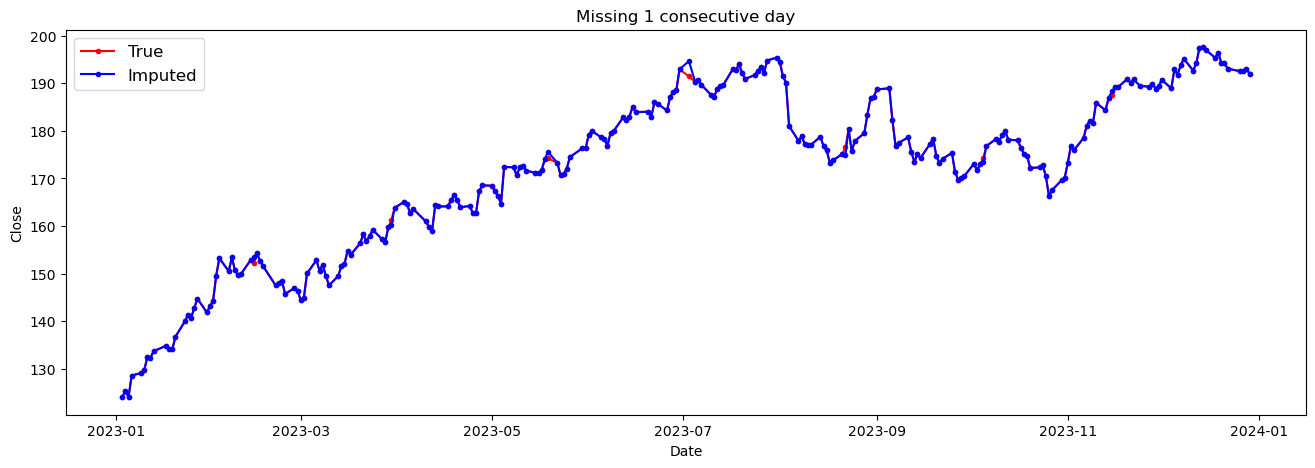

In [15]:
## Plot
import datetime

plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df1['1day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 1 consecutive day')

plt.show()

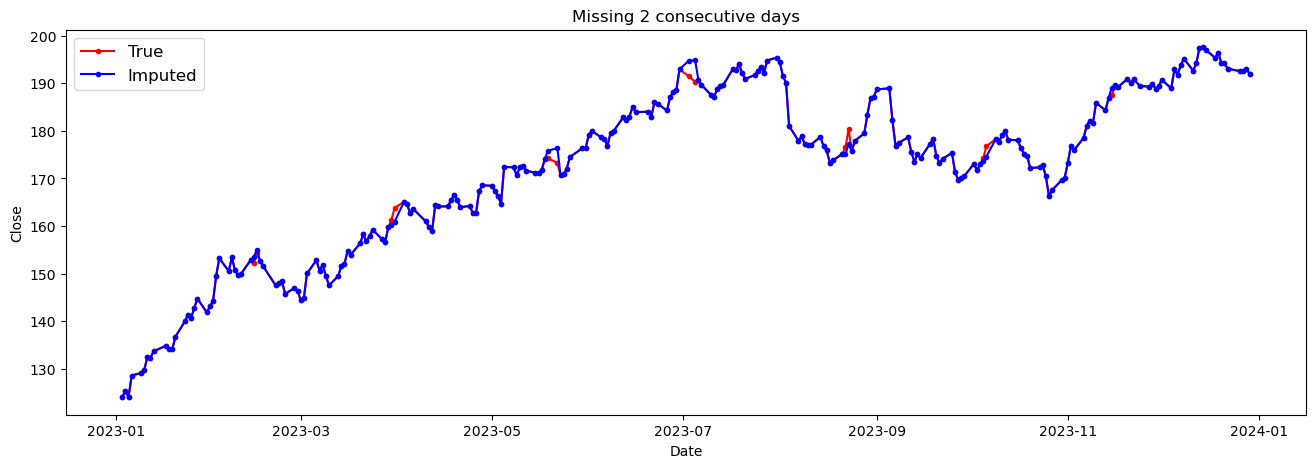

In [16]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df2['2day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 2 consecutive days')

plt.show()

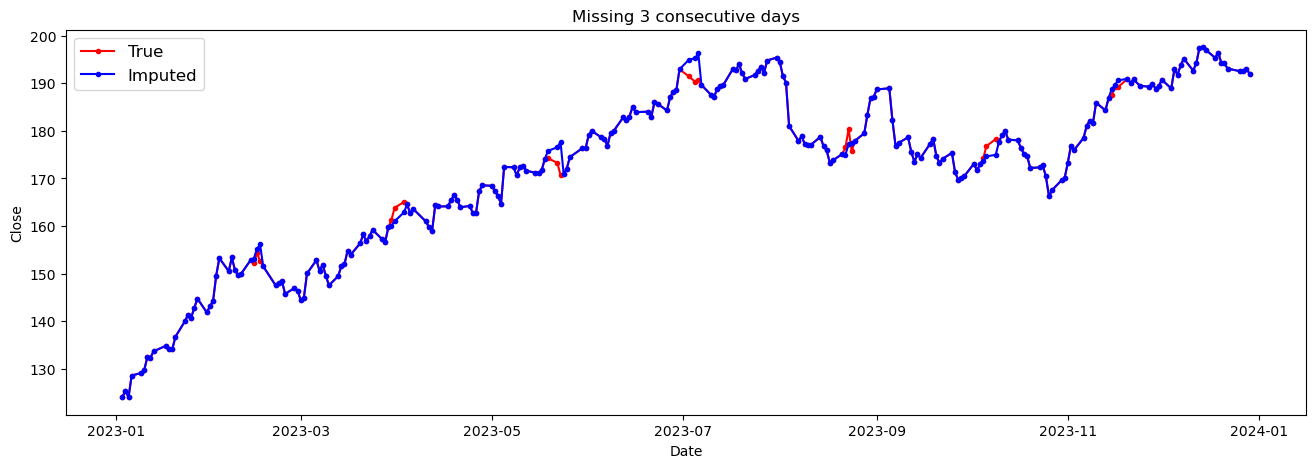

In [17]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df3['3day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 3 consecutive days')

plt.show()

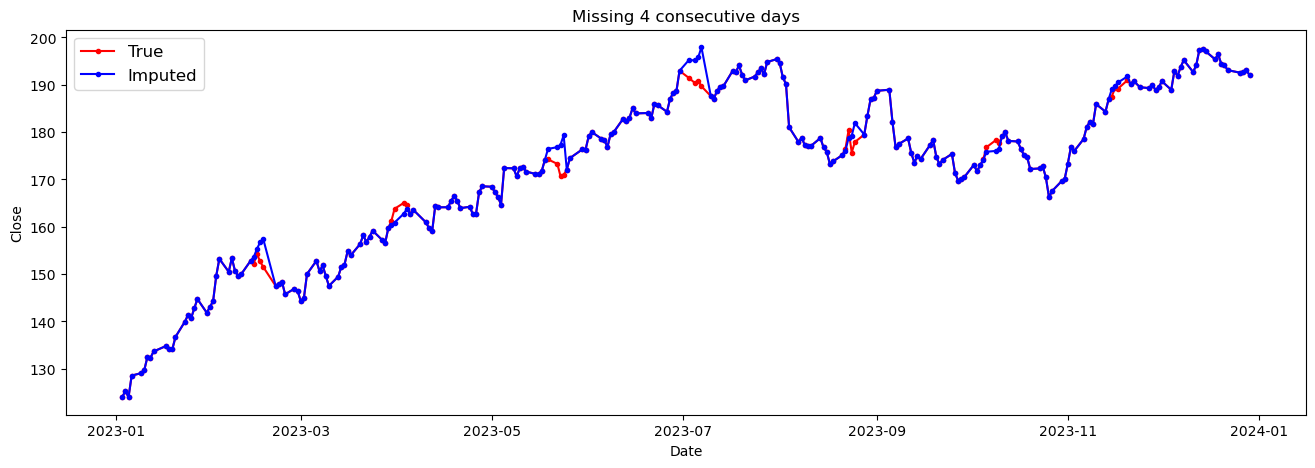

In [18]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df4['4day'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 4 consecutive days')

plt.show()

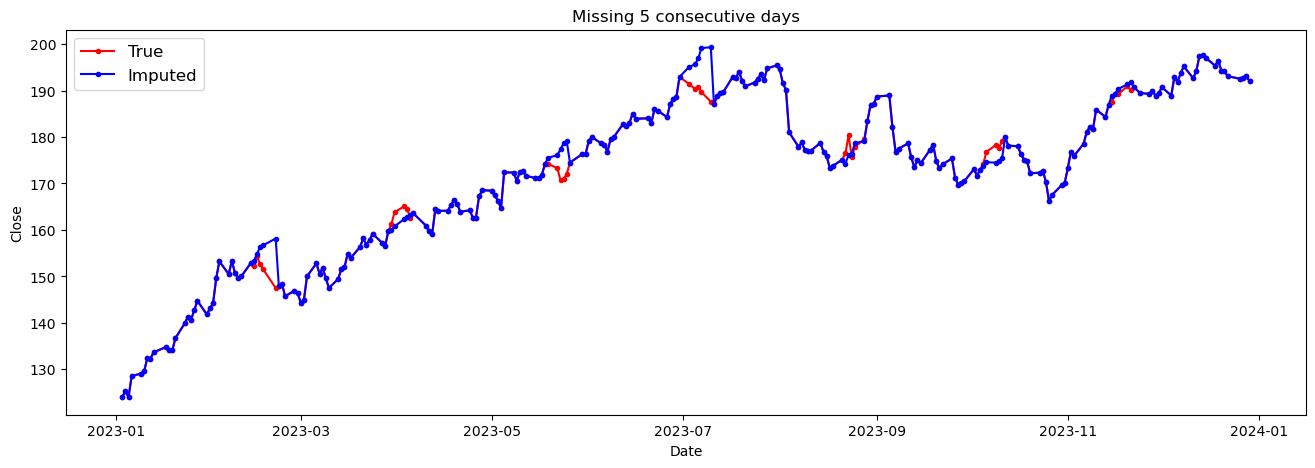

In [19]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(data['Close'],'.-',color='r',label='True')
plt.plot(df5['5day'],'.-',color='b',label='Imputed')
#plt.plot(nvda_data['Close'],'.-',color='k',label='NVDA')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close')

#plt.xlim([datetime.date(2023, 10, 1), datetime.date(2023, 10, 31)])

plt.title('Missing 5 consecutive days')

plt.show()

## Compare MSES

In [20]:
print('Missing 1 consecutive data')
print(mses1)
print('------------------')

print('Missing 2 consecutive data')
print(mses2)
print('------------------')

print('Missing 3 consecutive data')
print(mses3)
print('------------------')

print('Missing 4 consecutive data')
print(mses4)
print('------------------')

print('Missing 5 consecutive data')
print(mses5)
print('------------------')

Missing 1 consecutive data
{'Linear Interpolating': 0.679228361280242, 'VAR model': 2.649501741881111}
------------------
Missing 2 consecutive data
{'Linear Interpolating': 2.526317467717179, 'VAR model': 5.378330537548219}
------------------
Missing 3 consecutive data
{'Linear Interpolating': 1.8751985815220782, 'VAR model': 9.2559893211581}
------------------
Missing 4 consecutive data
{'Linear Interpolating': 3.398599024755626, 'VAR model': 13.442297627391287}
------------------
Missing 5 consecutive data
{'Linear Interpolating': 3.475544046464251, 'VAR model': 20.542833458826635}
------------------


## Plot MSE

In [21]:
ratio = np.zeros(5)

mses = [mses1, mses2, mses3, mses4, mses5]

for i, mse in enumerate(mses):
    ratio[i] = mse['VAR model']/mse['Linear Interpolating']

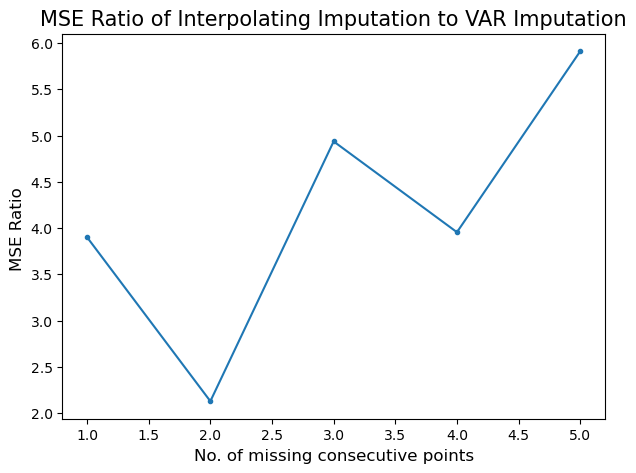

In [22]:
plt.figure(figsize=((7,5)))

plt.plot(range(1,6),ratio,'.-')
plt.xlabel('No. of missing consecutive points', fontsize=12)
plt.ylabel('MSE Ratio ', fontsize=12)

plt.title('MSE Ratio of Interpolating Imputation to VAR Imputation', fontsize=15)

plt.savefig('MSE Ratio.jpg')
plt.show()